## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split

## Get the Data

Ecommerce Customers:
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member
* Yearly Amount Spent

In [2]:
df = pd.read_csv('Data/Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()
# no null rows
# some of columns are objects - there will be not useful in our model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


## Exploratory Data Analysis

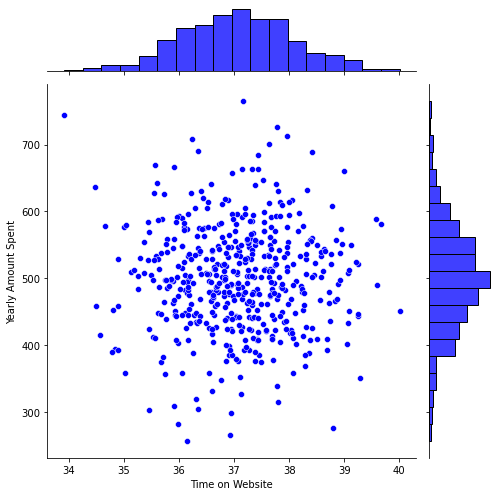

In [5]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df,
            kind="scatter", color="b", height=7);
#you can see the density in the middle of the graph

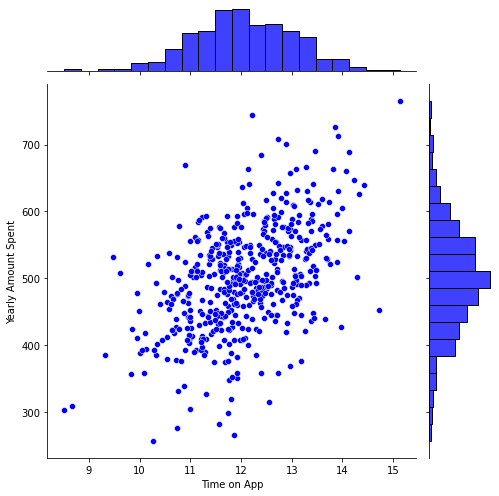

In [6]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=df,
            kind="scatter", color="b", height=7);
#a gentle correlation between the variables can be observed

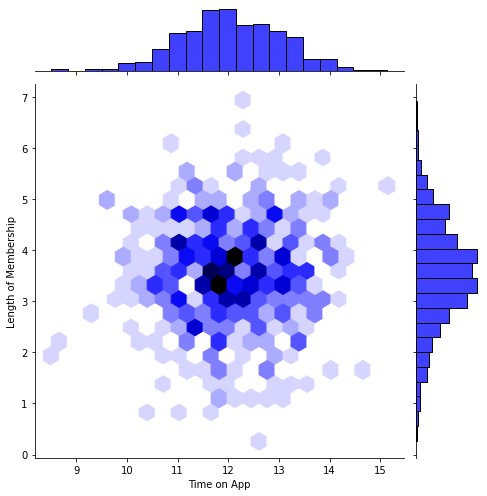

In [7]:
sns.jointplot(x="Time on App", y="Length of Membership", data=df,
            kind="hex", color="b", height=7);
#also you can see the density in the middle of the graph

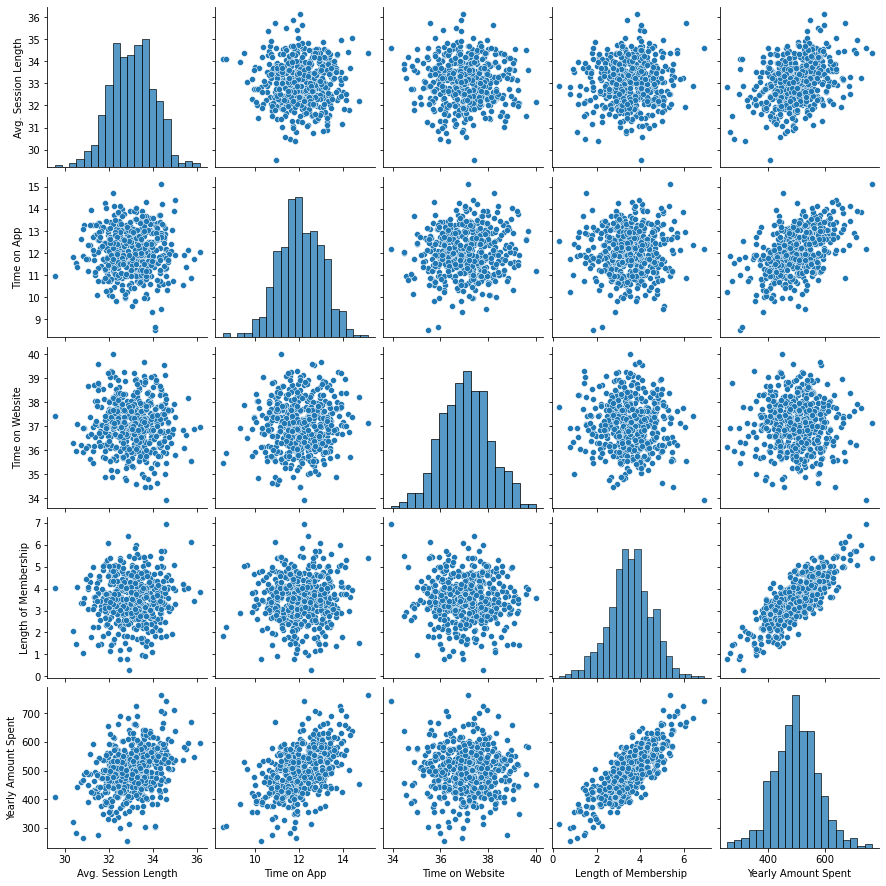

In [8]:
sns.pairplot(df);

You can see a correlation between Length of Membership and Yearly Amount Spent 	

<AxesSubplot:>

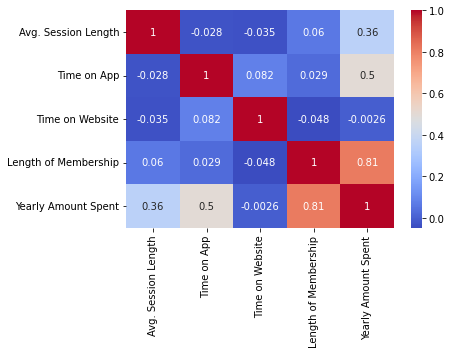

In [9]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

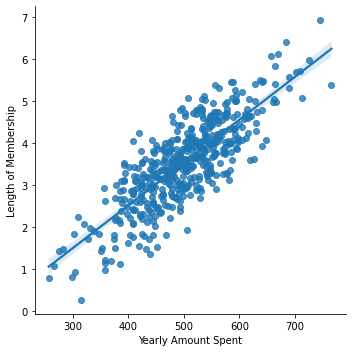

In [10]:
sns.lmplot(x = 'Yearly Amount Spent', y = 'Length of Membership', data = df)

## Training and Testing Data

In [11]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [12]:
y = df['Yearly Amount Spent']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training the Model

In [14]:
lm = LinearRegression().fit(X_train, y_train)

In [15]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['coeff'])
cdf

,coeff
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


In [16]:
lm.intercept_

-1050.653674664572

## Predicting Test Data

In [17]:
y_pred = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

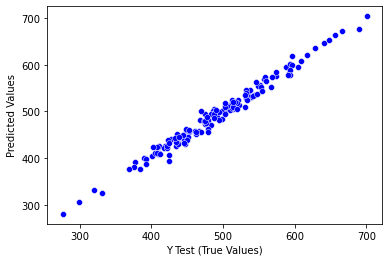

In [18]:
sns.scatterplot(x = y_test, y = y_pred, color="b")
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values');

## Evaluating the Model

In [19]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred))) 
explained_variance_score(y_test, y_pred)

MAE: 8.426091641432052
MSE: 103.91554136503235
RMSE: 10.193897260863107


0.9812611651910702

## Residuals

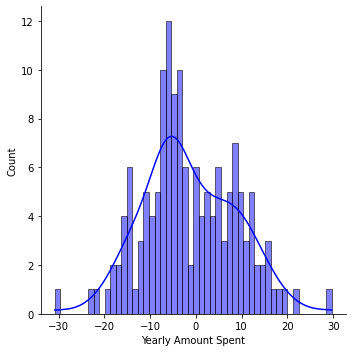

In [20]:
sns.displot((y_test - y_pred), color="b", kde = True, bins = 50);
# the residuals have almost a normal distribution

## Conclusion

People with long memberships and using apps are produce most of the income. <br/>
The time spent on the website or the length of the session did not matter that much.<br/>
Company should focus more on their mobile app.